In [1]:
import random
import math
import gym
import gym.spaces
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import *

env = gym.make('LunarLander-v2')

epsilon = 1
Gamma = 0.99
max_eps = epsilon
min_eps = 0.1
LAMBDA = 0.001
mem_allowed = 100000
mem_all = []
batch_size = 100
state_num = 8
action_num = 4
step = 0

Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [2]:
def explore_Greedy(epsilon,v):
    if np.random.rand()<epsilon:
        return np.random.randint(0,env.action_space.n)
    else:
        return np.argmax(v)

def eps_reduce(epsilon,min_eps,max_eps,step):
    return min_eps + (max_eps - min_eps) * math.exp(-LAMBDA*step)

def predict_2(model,data):
    return model.predict(data.reshape(1,state_num)).flatten()


def experience(exp_all,sample):
    return exp_all.append(sample)

In [10]:
state_num  = env.env.observation_space.shape[0]
action_num = env.env.action_space.n    

model = Sequential()
model.add(Dense(output_dim=120, activation='relu', input_dim=state_num))
model.add(Dense(output_dim=60, activation='relu'))
model.add(Dense(output_dim=action_num, activation='linear'))
opt = RMSprop(lr=0.00025)
model.compile(loss='mse', optimizer=opt) 
Reward_cum=np.zeros(1500)

for episode in range(1500):
    state = env.reset()
    R = 0
    state_num  = env.env.observation_space.shape[0]
    action_num = env.env.action_space.n    
   

    while True:
        
        action = explore_Greedy(epsilon, predict_2(model,state))
        
        state2, reward, done, info = env.step(action)
        
        if done: # terminal state
            state2 = None
            
        sample_to_add = ((state,action, reward,state2))
        
        state = state2
        epsilon = eps_reduce(epsilon,min_eps,max_eps,step)        
        R += reward
        step += 1
        
        mem_all.append(sample_to_add)
        
        if len(mem_all)>mem_allowed:
            mem_all.pop(0)
        
        num = np.min([batch_size,len(mem_all)])
        batch = random.sample(mem_all,num)

        no_next_state = np.zeros(state_num)
        states_now = np.array([iter[0] for iter in batch])
        states_next = np.array([(no_next_state if iter2[3] is None else iter2[3]) for iter2 in batch])

        predict_now = model.predict(states_now)
        predict_next = model.predict(states_next)

        x = np.zeros((len(batch),state_num))
        y = np.zeros((len(batch),action_num))

        for i in range(len(batch)):
            current_state = batch[i][0]
            action_taken = batch[i][1]
            reward_received = batch[i][2]
            next_state = batch[i][3]

            x[i] = current_state

            target = predict_now[i]

            if next_state is None:
                target[action_taken] = reward_received
            else:
                target[action_taken] = reward_received+ Gamma*np.amax(predict_next[i])

            y[i] = target
        
        model.fit(x,y,batch_size=batch_size,nb_epoch=1,verbose=0)
        
        #train_model(model,x,y)
        
        
        if done:
            break
     
    Reward_cum[episode]=R
    print("Reward for episode %s is %s" % (episode, R))
    if episode > 98:
        rm = np.mean(Reward_cum[episode-99:episode+1])
        print("Rolling mean is %s" %(rm))
model.save("lunarlander_weights_pzou3.h5")


8


NameError: name 'st' is not defined

In [7]:

model.save("lunarlander_weights_pzou3.h5")

R=np.zeros(100)
env_ = gym.make("LunarLander-v2")
model1 = Sequential()
model1.add(Dense(output_dim=120, activation='relu', input_dim=state_num))
model1.add(Dense(output_dim=60, activation='relu'))
model1.add(Dense(output_dim=action_num, activation='linear'))
opt = RMSprop(lr=0.00025)
model1.compile(loss='mse', optimizer=opt) 
model1.load_weights("lunarlander_weights_pzou3.h5")
for j in range(100):    
    s = env_.reset()
    while True:
        a=np.argmax(predict_2(model1,s))
        s_, r, done, info = env_.step(a)
        if done: # terminal state
            s_ = None
        s = s_
        R[j] += r
        if done:
            break
    print("Test Reward:", R[j])

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


C:\Users\Manik.Rajora\AppData\Local\Continuum\anaconda2\envs\Py36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=8, units=120)`
  import sys
C:\Users\Manik.Rajora\AppData\Local\Continuum\anaconda2\envs\Py36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=60)`
  
C:\Users\Manik.Rajora\AppData\Local\Continuum\anaconda2\envs\Py36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=4)`
  if __name__ == '__main__':


Test Reward: 229.0220773082191
Test Reward: 181.53427939472732
Test Reward: 223.14366748690549
Test Reward: 199.8995435469014
Test Reward: 196.40278841243165
Test Reward: 234.57093841578737
Test Reward: 174.90508944355776
Test Reward: 213.91555438671185
Test Reward: 212.65991078409627
Test Reward: 190.0196116014799
Test Reward: 206.5343094237776
Test Reward: 221.89989760604732
Test Reward: 190.927467325614
Test Reward: 193.28697726474493
Test Reward: 87.5584516350199
Test Reward: 186.86253093908797
Test Reward: 174.50141097800662
Test Reward: 184.20047432055458
Test Reward: 210.69842897941413
Test Reward: 219.4903676806149
Test Reward: 208.65664659685015
Test Reward: 229.88299701192815
Test Reward: 156.67854296596278
Test Reward: 215.30096100051725
Test Reward: 215.82158702038927
Test Reward: 198.41371638214292
Test Reward: 219.72014256355152
Test Reward: 191.93361837106983
Test Reward: 202.1011132502686
Test Reward: 237.98494296137304
Test Reward: 256.35939635953525
Test Reward: 200.3

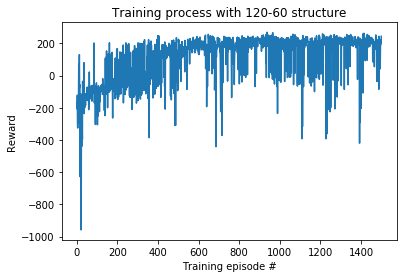

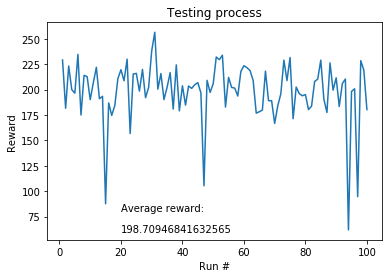

In [8]:
##training plot
x1=range(1,1501)
plt.plot(x1,Reward_cum)
plt.xlabel('Training episode #')
plt.ylabel('Reward')
plt.title('Training process with 120-60 structure')
plt.show()    

##testing plot
x=range(1,101)
avg_r=np.mean(R)
plt.plot(x, R)
plt.xlabel('Run #')
plt.ylabel('Reward')
plt.title('Testing process')
plt.text(20,80,'Average reward:')
plt.text(20,60,avg_r)
plt.show()

In [9]:
avg_r=np.mean(R)
print(avg_r)

198.70946841632565
